<a href="https://colab.research.google.com/github/metisos/ReactLeaflet/blob/main/Data_Conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Map from CSV Data

In [ ]:
# Install necessary libraries
!pip install pandas folium

# Import libraries
import pandas as pd
import folium

# Load data from CSV file
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/complete_murderdata.csv')

# Create a map centered around an average location in the data
# Ensure that 'latitude' and 'longitude' are the correct column names in your CSV file
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add points to the map
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Display the map
m




# Convert CSV to JSON

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('/content/updated_2023_month_1.csv')

# Convert to JSON
df.to_json('2023jan.json', orient='records')


# Convert CSV to GeoJSON

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load CSV file
csv_file = '/content/complete_murderdata.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Ensure that latitude and longitude columns are in float format
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
)

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Save to GeoJSON file
geojson_file = 'output.geojson'  # Output file name
gdf.to_file(geojson_file, driver='GeoJSON')


# Convert GeoJSON to Shapefile

In [ ]:
import geopandas as gpd

# Path to your GeoJSON file
geojson_file = 'output.geojson'  # Replace with your GeoJSON file path

# Load the GeoJSON file
gdf = gpd.read_file(geojson_file)

# Path for the output Shapefile
shapefile_output = 'sample.shp'  # Replace with your desired output path

# Save as Shapefile
gdf.to_file(shapefile_output, driver='ESRI Shapefile')


# Convert CSV to Shapefile

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Path to your CSV file
csv_file = 'structures.csv'  # Replace with your CSV file path

# Load the CSV file
df = pd.read_csv(csv_file)

# Ensure latitude and longitude columns are in the correct format
# Replace 'latitude' and 'longitude' with your actual column names if they are different
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat'])
)

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Path for the output Shapefile
shapefile_output = 'fullset.shp'  # Replace with your desired output path

# Save as Shapefile
gdf.to_file(shapefile_output, driver='ESRI Shapefile')


<ipython-input-16-f65dfa170d5f>:29: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(shapefile_output, driver='ESRI Shapefile')


# DuckDB

In [ ]:
import duckdb
duckdb.read_csv('/content/Book1.csv')

┌────────────────┬──────────┬──────────┬──────────────────────┬───┬──────────┬──────────┬──────────────────────┐
│    column00    │ column01 │ column02 │       column03       │ … │ column19 │ column20 │       column21       │
│    varchar     │   time   │  int64   │       varchar        │   │  int64   │ varchar  │       varchar        │
├────────────────┼──────────┼──────────┼──────────────────────┼───┼──────────┼──────────┼──────────────────────┤
│ 3/1/2024 0:00  │ 02:00:00 │ 24008583 │ LEAVING THE SCENE …  │ … │     NULL │ No       │ Offenses - All Oth…  │
│ 3/1/2024 0:00  │ 02:07:00 │ 24008584 │ ASSAULT - 3RD DEGREE │ … │   379443 │ No       │ Simple Assault - C…  │
│ 3/1/2024 0:00  │ 02:07:00 │ 24008584 │ PROPERTY DAMAGE 1S…  │ … │     NULL │ No       │ Simple Assault - C…  │
│ 3/1/2024 0:00  │ 02:00:00 │ 24008585 │ PROPERTY DAMAGE - …  │ … │     NULL │ No       │ Destruction of Pro…  │
│ 3/1/2024 0:00  │ 05:44:00 │ 24008591 │ PROPERTY DAMAGE - …  │ … │     NULL │ Yes      │ Weapon

# Convert Data by Year

In [ ]:
# Import necessary libraries
import pandas as pd


# Load data from CSV file
file_path = '/content/February2024.csv'  # Replace with your file path if different
df = pd.read_csv(file_path)

# Convert the 'date_inc' column to datetime and extract the year
df['year'] = pd.to_datetime(df['IncidentDate'], errors='coerce').dt.year

# Filter data for the year 2023 and drop rows with NaN in Latitude or Longitude
filtered_df_2023_full = df[df['year'] == 2024]

# Save this filtered data to a new CSV file
output_file_path = 'updated_2024.csv'
filtered_df_2023_full.to_csv(output_file_path, index=False)

output_file_path



'updated_2024.csv'

# Convert Data by Month

In [ ]:
import pandas as pd

# Load data from CSV file
file_path = '/content/updated_2024.csv'  # Replace with your file path if different
df = pd.read_csv(file_path)

# Convert the 'date_inc' column to datetime
df['IncidentDate'] = pd.to_datetime(df['IncidentDate'], errors='coerce')

# Filter data for the year 2022
df_2023 = df[df['IncidentDate'].dt.year == 2024]

# Extract the month from the 'date_inc' column
df_2023['month'] = df_2023['IncidentDate'].dt.month

# Group data by month
grouped_by_month = df_2023.groupby('month')

# To save the grouped data to new CSV files for each month
for month, group in grouped_by_month:
    output_file_path = f'updated_2024_month_{month}.csv'
    group.to_csv(output_file_path, index=False)
    print(f"Saved file for month {month}: {output_file_path}")


# Filter Columns

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/Book1.csv'

# Load the data
df = pd.read_csv(file_path)

# Select only the desired columns
desired_columns = ['Latitude', 'Longitude', 'IncidentDate', 'IncidentNum', 'Offense']
df_subset = df[desired_columns]

# Save the new DataFrame with only the selected columns to a new CSV file
output_file_path = 'filtered_data_jan2023.csv'
df_subset.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")


Filtered data saved to filtered_data_jan2023.csv


# Convert Data by Type

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/filtered_data_mar2024.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Get unique offenses
unique_offenses = df['Offense'].unique()

# Create a directory to store the offense files, if you don't have one already
import os
output_directory = 'offense_files_complete'
os.makedirs(output_directory, exist_ok=True)

# Save a CSV file for each offense
for offense in unique_offenses:
    # Filter the DataFrame
    offense_df = df[df['Offense'] == offense]

    # Create a valid filename from the offense name
    filename = f"{offense.replace(' ', '_').replace('/', '_')}.csv"
    offense_file_path = os.path.join(output_directory, filename)

    # Save the filtered DataFrame to a CSV
    offense_df.to_csv(offense_file_path, index=False)

    print(f"Saved file for offense '{offense}' to '{offense_file_path}'")


Saved file for offense 'ASSAULT - 3RD DEGREE' to 'offense_files_complete/ASSAULT_-_3RD_DEGREE.csv'
Saved file for offense 'PROPERTY DAMAGE 1ST DEGREE' to 'offense_files_complete/PROPERTY_DAMAGE_1ST_DEGREE.csv'
Saved file for offense 'PROPERTY DAMAGE - 2ND DEGREE' to 'offense_files_complete/PROPERTY_DAMAGE_-_2ND_DEGREE.csv'
Saved file for offense 'UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHARGE INTO HOME, MOTOR VEHICLE OR OTHER TRANSPORTATION METHOD' to 'offense_files_complete/UNLAWFUL_USE_OF_WEAPON_-_SUBSECTION_3_-_DISCHARGE_INTO_HOME,_MOTOR_VEHICLE_OR_OTHER_TRANSPORTATION_METHOD.csv'
Saved file for offense 'LEAVING THE SCENE OF A MOTOR VEHICLE ACCIDENT' to 'offense_files_complete/LEAVING_THE_SCENE_OF_A_MOTOR_VEHICLE_ACCIDENT.csv'
Saved file for offense 'UNLAWFUL USE OF WEAPON - SUBSECTION 9 - SHOOT AT/FROM MOTOR VEHICLE, AT PERSON, MOTOR VEHICLE OR BUILDING' to 'offense_files_complete/UNLAWFUL_USE_OF_WEAPON_-_SUBSECTION_9_-_SHOOT_AT_FROM_MOTOR_VEHICLE,_AT_PERSON,_MOTOR_VEHICLE_OR_BU

# Combine Datasets by Type

In [ ]:
import pandas as pd
import os

# Define the directory where the offense files are stored
offense_directory = '/content/offense_files_complete'  # Update this with the actual path to your offense files

# List of offenses to combine, replace with actual offense names as per the filenames
offenses_to_combine = [
    'MURDER_1ST_DEGREE',
    'MURDER_2ND_DEGREE',

]

# Initialize an empty list to hold the data from each file
dataframes = []

# Loop through the list of offenses, read the corresponding CSV files and append to the list
for offense in offenses_to_combine:
    # Create a valid filename from the offense name
    filename = f"{offense}.csv".replace('/', '_').replace(' ', '_').replace(',', '')
    file_path = os.path.join(offense_directory, filename)

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file and append to the list
        df = pd.read_csv(file_path)
        dataframes.append(df)
    else:
        print(f"File not found: {filename}")

# Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_file_path = '/content/complete_murderdata.csv'  # Updated to include .csv

# Save the combined dataframe
combined_df.to_csv(combined_file_path, index=False)

print(f"Combined dataset saved to {combined_file_path}")



File not found: MURDER_2ND_DEGREE.csv
Combined dataset saved to /content/complete_murderdata.csv


In [ ]:
pip install geopy


# Python Script for Geocoding

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd

def geocode_address(address):
    """Geocode an address using Nominatim and return its latitude and longitude."""
    geolocator = Nominatim(user_agent="geoapiExercises")
    try:
        location = geolocator.geocode(address)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except GeocoderTimedOut:
        return (None, None)

# Example: Geocoding a single address
address = "1600 Amphitheatre Parkway, Mountain View, CA"
latitude, longitude = geocode_address(address)
print(f"Latitude: {latitude}, Longitude: {longitude}")

# If you have a DataFrame of addresses
# df = pd.read_csv('your_file.csv')  # Load your data file
# df['coordinates'] = df['address_column'].apply(geocode_address)


GeocoderInsufficientPrivileges: Non-successful status code 403

In [ ]:
import geopandas as gpd

def generate_geojson_for_country(country_name, output_filename, color):
    # Load world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filter the country by name
    country = world[world['name'] == country_name]

    # Check if the country exists in the dataset
    if country.empty:
        print(f"Country '{country_name}' not found in dataset.")
        return

    # Add a 'color' column to the GeoDataFrame
    country['color'] = color

    # Save to GeoJSON, including the 'color' property
    country.to_file(output_filename, driver='GeoJSON')
    print(f"GeoJSON for '{country_name}' saved as '{output_filename}' with color '{color}'.")

# Example usage
country_name = "France"  # Change this to the country you need
output_filename = "france.geojson"  # The output file
color = "#FF5733"  # Example color in HEX format
generate_geojson_for_country(country_name, output_filename, color)



<ipython-input-1-0898d3a149dd>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


GeoJSON for 'France' saved as 'france.geojson' with color '#FF5733'.


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
import pandas as pd
import geopandas as gpd
from collections import defaultdict

def generate_geojson_with_conflict_severity(csv_file_path, output_geojson_path):
    # Define color codes for each threat level
    color_map = {
        'Low': '#58D68D',  # Green
        'Moderate': '#F7DC6F',  # Light Orange
        'Intermediate': '#F4D03F',  # Yellow
        'Medium': '#DC7633',  # Orange
        'High': '#C0392B',  # Red
        'Critical': '#A93226',  # Dark Red
        'Not Applicable': '#D3D3D3',  # Light Grey for 'Not Applicable' and missing data
    }

    # Load the conflict data from CSV
    conflict_data = pd.read_csv(csv_file_path)

    # Initialize a dictionary to hold the highest threat level for each region
    highest_threat_level_per_region = defaultdict(lambda: 'Not Applicable')

    # Process each entry in the dataset
    for _, row in conflict_data.iterrows():
        region = row['region']
        threat_level = row['threat_level']
        # Skip if threat level is NaN or not in our color map
        if pd.isna(threat_level) or (threat_level not in color_map and threat_level != 'Not Applicable'):
            continue
        # Compare and update the threat level if the current one is higher
        current_order = list(color_map.keys()).index(highest_threat_level_per_region[region])
        new_order = list(color_map.keys()).index(threat_level)
        if new_order > current_order:
            highest_threat_level_per_region[region] = threat_level

    # Load world map data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Map the highest threat level to each country
    world['color'] = world['name'].apply(lambda x: color_map[highest_threat_level_per_region[x]])

    # Save the GeoDataFrame as GeoJSON
    world.to_file(output_geojson_path, driver='GeoJSON')
    print(f"GeoJSON file saved to {output_geojson_path}")

# Specify the CSV file path and the output GeoJSON file path
csv_file_path = '/content/conflicts.csv'  # Update this path
output_geojson_path = '/content/conflictsnew.csv'  # Update this path

# Run the function
if __name__ == "__main__":
    generate_geojson_with_conflict_severity(csv_file_path, output_geojson_path)






<ipython-input-7-0fee41b9b717>:37: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


GeoJSON file saved to /content/conflictsnew.csv


In [ ]:
for region, level in region_threat_levels.items():
    print(f"{region}: {level}")


In [ ]:
import geopandas as gpd
import pandas as pd
import folium

# Sample conflict data (replace this with your actual data)
conflict_data = pd.DataFrame({
    'Continent': ['Africa', 'Asia', 'Europe'],
    'ConflictSeverity': [1, 2, 3],  # Replace with your conflict severity data for continents
})

# Define severity levels and corresponding colors
severity_colors = {
    1: 'green',
    2: 'yellow',
    3: 'red',
}

# Load a world countries GeoJSON file (replace with your preferred source)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge conflict data with world data based on continent name
merged_data = world.merge(conflict_data, left_on='continent', right_on='Continent', how='left')

# Fill missing values with a default severity level (e.g., 0)
merged_data['ConflictSeverity'].fillna(0, inplace=True)

# Map severity levels to colors
merged_data['Color'] = merged_data['ConflictSeverity'].map(severity_colors)

# Select relevant columns for the GeoJSON
geojson_data = merged_data[['continent', 'geometry', 'Color']].dissolve(by='continent', aggfunc='first')

# Save the GeoJSON file
geojson_data.to_file("continent_conflict_risk_index.geojson", driver='GeoJSON')

# Create a folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the GeoJSON layer to the map
folium.GeoJson(
    "continent_conflict_risk_index.geojson",
    name='Conflict Risk Index',
    style_function=lambda x: {'fillColor': x['properties']['Color'], 'color': 'black', 'weight': 2},
    highlight_function=lambda x: {'weight': 3},
    smooth_factor=2.0
).add_to(m)

# Display the map
m.save("continent_conflict_map.html")
m


<ipython-input-1-a8da96e17c19>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
import geopandas as gpd
import pandas as pd

# Sample conflict data (replace this with your actual data)
conflict_data = pd.DataFrame({
    'Continent': ['Africa', 'Asia', 'Europe'],
    'ConflictSeverity': [1, 2, 3],  # Replace with your conflict severity data for continents
})

# Define severity levels and corresponding colors
severity_colors = {
    1: 'green',
    2: 'yellow',
    3: 'red',
}

# Load a world countries GeoJSON file (replace with your preferred source)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge conflict data with world data based on continent name
merged_data = world.merge(conflict_data, left_on='continent', right_on='Continent', how='left')

# Fill missing values with a default severity level (e.g., 0)
merged_data['ConflictSeverity'].fillna(0, inplace=True)

# Map severity levels to colors
merged_data['Color'] = merged_data['ConflictSeverity'].map(severity_colors)

# Select relevant columns for the GeoJSON
geojson_data = merged_data[['continent', 'geometry', 'Color']].dissolve(by='continent', aggfunc='first')

# Save the GeoJSON file
geojson_data.to_file("riskindex.geojson", driver='GeoJSON')

print("GeoJSON file for continent conflict risk index created successfully.")


GeoJSON file for continent conflict risk index created successfully.


<ipython-input-2-9fc2f087b83f>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
pip install statsmodels pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.7 MB/s eta 0:00:00


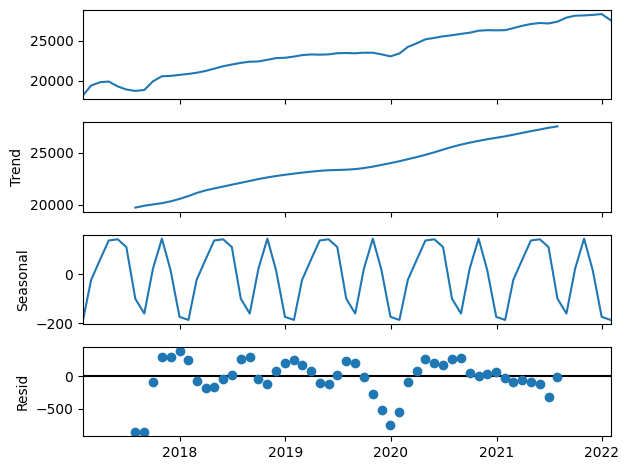

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=861.319, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=839.898, Time=0.83 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=831.445, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=873.171, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=829.447, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=831.446, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=833.383, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=830.018, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=830.155, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=837.922, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=832.018, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=833.241, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 5.510 seconds
                         

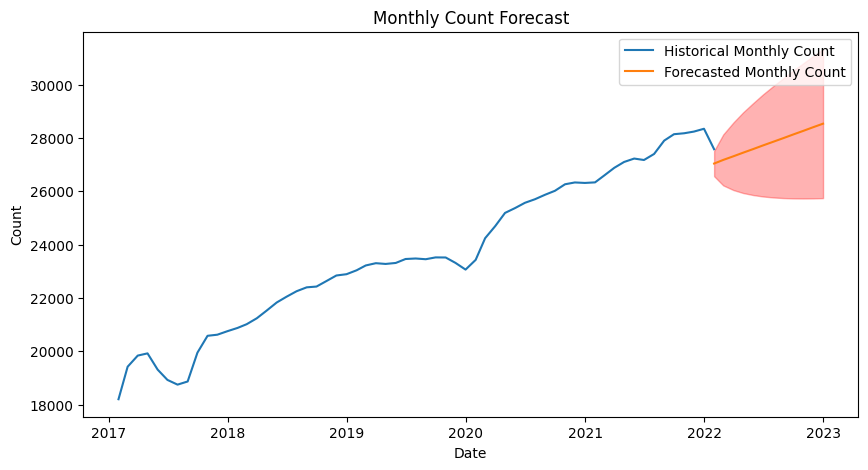

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Load the data
data_path = '/content/structures.csv'  # Make sure to replace this with the actual path to your data file
data = pd.read_csv(data_path)

# Convert 'composite_date' to datetime format and set as the index
data['composite_date'] = pd.to_datetime(data['composite_date'])
data.set_index('composite_date', inplace=True)

# Resample and sum the data monthly
monthly_data = data.resample('M').size()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_data, model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

# Forecasting with ARIMA
# Using auto_arima to find the best ARIMA parameters
model = auto_arima(monthly_data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Summary of the model
print(model.summary())

# For forecasting, you can specify the number of periods to forecast
n_periods = 12  # For example, forecast the next 12 months
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data.index, monthly_data, label='Historical Monthly Count')
plt.plot(pd.date_range(monthly_data.index[-1], periods=n_periods, freq='M'), forecast, label='Forecasted Monthly Count')
plt.fill_between(pd.date_range(monthly_data.index[-1], periods=n_periods, freq='M'), conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('Monthly Count Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()




In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the data
data_path = '/content/theftdata.csv'  # Update this path to your actual data file location
data = pd.read_csv(data_path)

# Create a map centered around an average location
map_ = folium.Map(location=[data['lat'].mean(), data['lon'].mean()], zoom_start=5)

# Add a heatmap to the map
HeatMap(data[['lat', 'lon']], radius=10).add_to(map_)  # Adjust 'radius' for heat point size as necessary

# Save the map to an HTML file


# Display the map (if in Jupyter Notebook, otherwise the map is saved and can be opened in a browser)
map_


ValueError: Location values cannot contain NaNs.

<ipython-input-10-ec0c62fb6929>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cluster'] = db_cleaned.labels_


<Figure size 1000x1000 with 0 Axes>

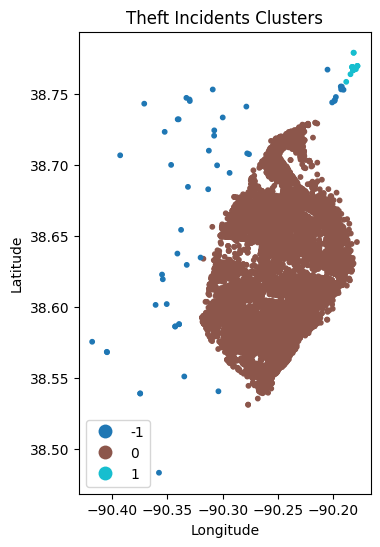

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load your data
file_path = '/content/theftdata.csv'  # Update this to your actual file path
data = pd.read_csv(file_path)

# Convert `date_inc` to datetime and drop rows with NaN in coordinates
data['date_inc'] = pd.to_datetime(data['date_inc'])
cleaned_data = data.dropna(subset=['Latitude', 'Longitude'])

# Apply DBSCAN clustering
db_cleaned = DBSCAN(eps=0.01, min_samples=10).fit(cleaned_data[['Latitude', 'Longitude']])
cleaned_data['cluster'] = db_cleaned.labels_

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(cleaned_data, geometry=gpd.points_from_xy(cleaned_data.Longitude, cleaned_data.Latitude))
gdf.crs = "EPSG:4326"

# Plotting
plt.figure(figsize=(10, 10))
gdf.plot(column='cluster', categorical=True, legend=True, figsize=(10, 6), markersize=10)
plt.title('Theft Incidents Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
pip install geoplot

In [ ]:
import geoplot
import geoplot.crs as gcrs

# Assuming `gdf` is already your GeoDataFrame from the previous steps
# We'll use the KDE (Kernel Density Estimate) plot to create a heatmap

geoplot.kdeplot(
    gdf,
    cmap="Reds",
    shade=True,
    clip=gdf.geometry,
    projection=gcrs.WebMercator(),
    figsize=(10, 10)
)
plt.title('Theft Incidents Heatmap')
plt.show()


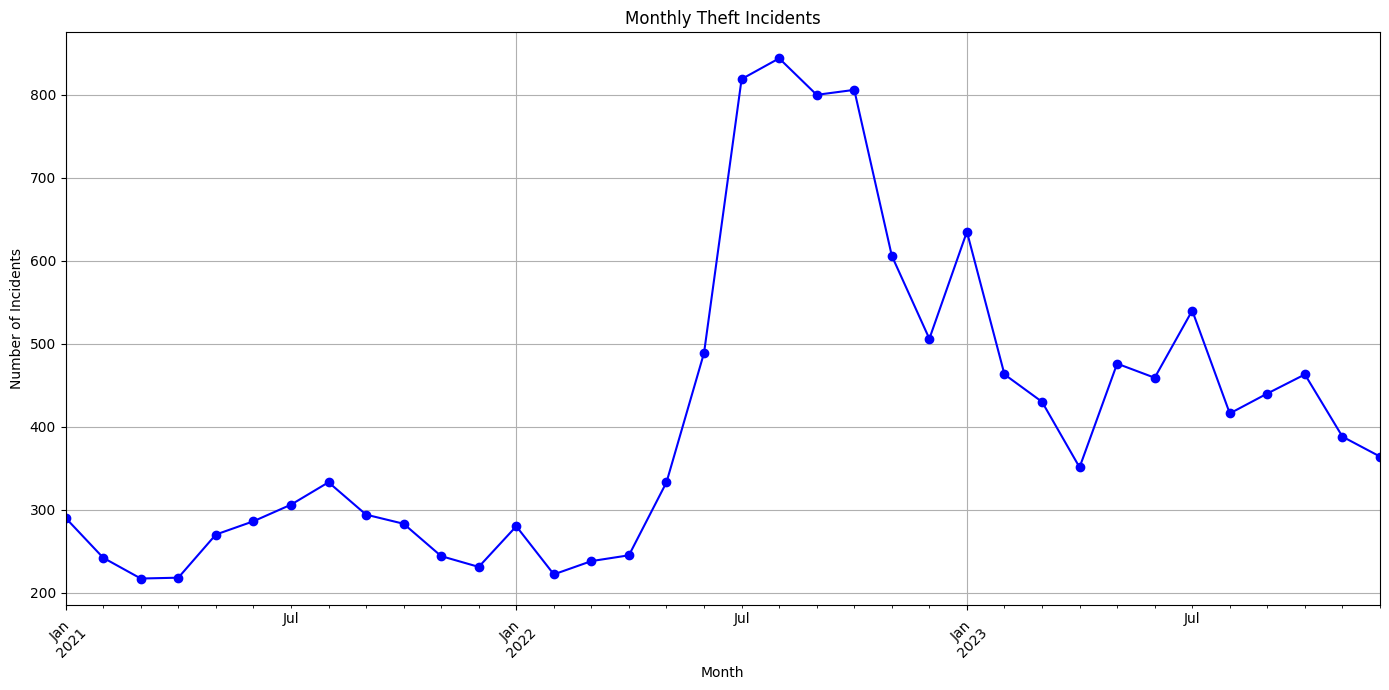

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/theftdata.csv'  # Update this with the actual path to your CSV file
data = pd.read_csv(file_path)

# Convert the date_inc column to datetime format
data['date_inc'] = pd.to_datetime(data['date_inc'])

# Set the date_inc as the index of the DataFrame
data.set_index('date_inc', inplace=True)

# Resample the data to get monthly theft counts
monthly_theft_counts = data.resample('M').size()

# Plotting the monthly theft counts
plt.figure(figsize=(14, 7))
monthly_theft_counts.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Theft Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding

plt.show()
